In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import time
import matplotlib.pyplot as plt

# 데이터셋 로드
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# 이미지 데이터 정규화
train_images, test_images = train_images / 255.0, test_images / 255.0

# 레이블을 원-핫 인코딩으로 변환
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# 모델 구축
model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),  # 입력 이미지의 차원을 평탄화
    layers.Dense(512, activation='relu'),    # 512개의 뉴런과 ReLU 활성화 함수를 사용한 은닉층
    layers.Dense(256, activation='relu'),    # 256개의 뉴런과 ReLU 활성화 함수를 사용한 은닉층
    layers.Dense(10, activation='softmax')   # 10개의 뉴런과 소프트맥스 활성화 함수를 사용한 출력층
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))


Epoch 1/10
782/782 [==============================] - 31s 39ms/step - loss: 1.8678 - accuracy: 0.3301 - val_loss: 1.7275 - val_accuracy: 0.3785
Epoch 2/10
782/782 [==============================] - 22s 28ms/step - loss: 1.6763 - accuracy: 0.3987 - val_loss: 1.6223 - val_accuracy: 0.4225
Epoch 3/10
782/782 [==============================] - 23s 29ms/step - loss: 1.5831 - accuracy: 0.4369 - val_loss: 1.5487 - val_accuracy: 0.4505
Epoch 4/10
782/782 [==============================] - 23s 29ms/step - loss: 1.5275 - accuracy: 0.4527 - val_loss: 1.5227 - val_accuracy: 0.4616
Epoch 5/10
782/782 [==============================] - 23s 30ms/step - loss: 1.4886 - accuracy: 0.4685 - val_loss: 1.5104 - val_accuracy: 0.4650
Epoch 6/10
782/782 [==============================] - 22s 29ms/step - loss: 1.4525 - accuracy: 0.4825 - val_loss: 1.5071 - val_accuracy: 0.4660
Epoch 7/10
782/782 [==============================] - 23s 29ms/step - loss: 1.4226 - accuracy: 0.4925 - val_loss: 1.4444 - val_accuracy:

In [14]:
# Batch Normalization 층을 추가
model.add(layers.BatchNormalization())
model.add(layers.Dense(512, activation='relu'))  # 512개의 뉴런과 ReLU 활성화 함수를 사용한 은닉층
model.add(layers.BatchNormalization())
model.add(layers.Dense(256, activation='relu'))  # 256개의 뉴런과 ReLU 활성화 함수를 사용한 은닉층
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation ='softmax'))
model.add(layers.BatchNormalization())

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련 - Batch Normalization 없는 경우
history_no_bn = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))


Epoch 1/10
782/782 [==============================] - 39s 45ms/step - loss: 7.3817 - accuracy: 0.1135 - val_loss: 6.1021 - val_accuracy: 0.1053
Epoch 2/10
782/782 [==============================] - 35s 44ms/step - loss: 6.5261 - accuracy: 0.0931 - val_loss: 5.5576 - val_accuracy: 0.0805
Epoch 3/10
782/782 [==============================] - 34s 43ms/step - loss: 7.9581 - accuracy: 0.0659 - val_loss: 8.2544 - val_accuracy: 0.0998
Epoch 4/10
782/782 [==============================] - 39s 49ms/step - loss: 7.8288 - accuracy: 0.1248 - val_loss: 5.8851 - val_accuracy: 0.0883
Epoch 5/10
782/782 [==============================] - 32s 42ms/step - loss: 7.7719 - accuracy: 0.1255 - val_loss: 7.6604 - val_accuracy: 0.1255
Epoch 6/10
782/782 [==============================] - 33s 43ms/step - loss: 7.7050 - accuracy: 0.1256 - val_loss: 7.6667 - val_accuracy: 0.1252
Epoch 7/10
782/782 [==============================] - 34s 43ms/step - loss: 7.7910 - accuracy: 0.1230 - val_loss: 9.2948 - val_accuracy:

Epoch 1/10
782/782 [==============================] - 40s 45ms/step - loss: 9.6689 - accuracy: 0.1000 - val_loss: 8.7570 - val_accuracy: 0.1000
Epoch 2/10
782/782 [==============================] - 34s 44ms/step - loss: 9.6696 - accuracy: 0.1000 - val_loss: 8.7345 - val_accuracy: 0.1000
Epoch 3/10
782/782 [==============================] - 34s 43ms/step - loss: 9.6676 - accuracy: 0.1000 - val_loss: 8.7185 - val_accuracy: 0.1000
Epoch 4/10
782/782 [==============================] - 34s 43ms/step - loss: 9.6686 - accuracy: 0.1000 - val_loss: 8.7468 - val_accuracy: 0.1000
Epoch 5/10
782/782 [==============================] - 34s 44ms/step - loss: 9.6689 - accuracy: 0.1000 - val_loss: 8.7753 - val_accuracy: 0.1000
Epoch 6/10
782/782 [==============================] - 34s 44ms/step - loss: 9.6689 - accuracy: 0.1000 - val_loss: 8.7163 - val_accuracy: 0.1000
Epoch 7/10
782/782 [==============================] - 34s 44ms/step - loss: 9.6680 - accuracy: 0.1000 - val_loss: 8.8316 - val_accuracy:

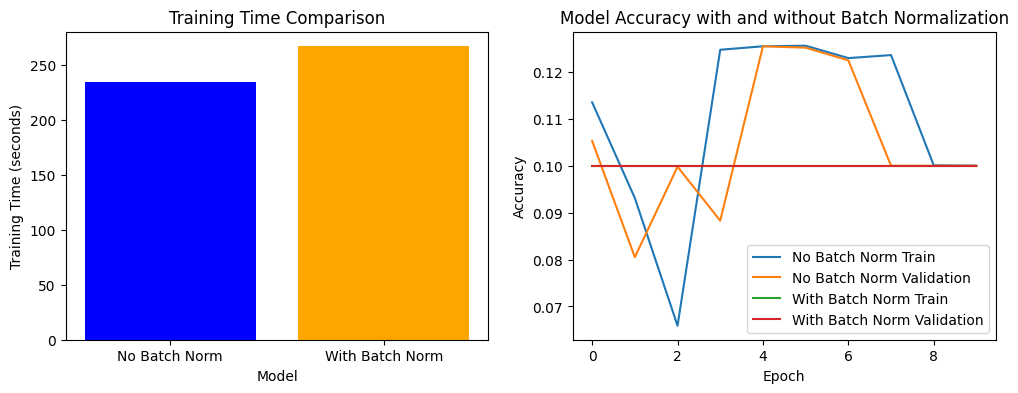

1/1 [==============================] - 0s 250ms/step


1/1 [==============================] - 0s 103ms/step


<ipython-input-16-cc533dd97cdb>:57: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, len(activations_bn), i)
<ipython-input-16-cc533dd97cdb>:63: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


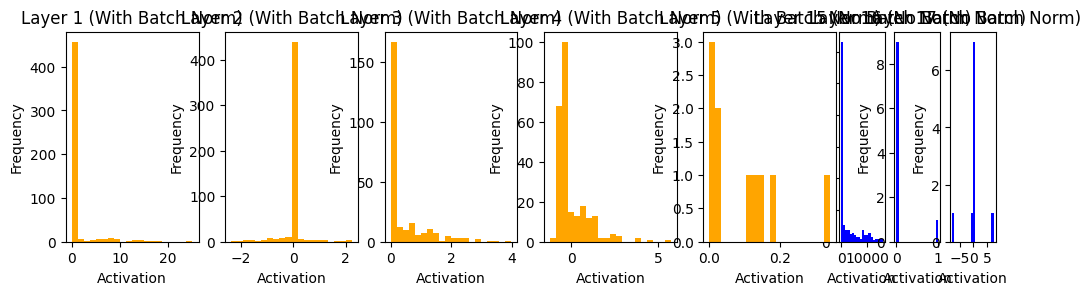

In [16]:
# 모델 컴파일 - Batch Normalization 있는 경우
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련 - Batch Normalization 있는 경우
history_bn = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))


# 성능 및 과대적합 비교
plt.figure(figsize=(12, 4))

# 훈련 속도 비교
plt.subplot(1, 2, 1)
plt.bar(['No Batch Norm', 'With Batch Norm'], [training_time_no_bn, training_time_bn], color=['blue', 'orange'])
plt.title('Training Time Comparison')
plt.ylabel('Training Time (seconds)')
plt.xlabel('Model')

# 과대적합 비교
plt.subplot(1, 2, 2)
plt.plot(history_no_bn.history['accuracy'], label='No Batch Norm Train')
plt.plot(history_no_bn.history['val_accuracy'], label='No Batch Norm Validation')
plt.plot(history_bn.history['accuracy'], label='With Batch Norm Train')
plt.plot(history_bn.history['val_accuracy'], label='With Batch Norm Validation')
plt.title('Model Accuracy with and without Batch Normalization')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 각 층의 출력 분포 확인
activation_outputs_no_bn = [layer.output for layer in model.layers]
activation_model_no_bn = models.Model(inputs=model.input, outputs=activation_outputs_no_bn)

activation_outputs_bn = [layer.output for layer in model_bn.layers]
activation_model_bn = models.Model(inputs=model_bn.input, outputs=activation_outputs_bn)

# 입력 이미지에 대한 활성화 출력 얻기
activations_no_bn = activation_model_no_bn.predict(test_images[:1])
activations_bn = activation_model_bn.predict(test_images[:1])

# 출력 분포 시각화
plt.figure(figsize=(12, 6))
for i, activation in enumerate(activations_no_bn):
    if i == 0:  # 입력층은 건너뜀-> 이미지를 받고 데이터를 전달하는 것 뿐이기 때문이다.
        continue
    plt.subplot(2, len(activations_no_bn)-1, i)
    plt.hist(activation.flatten(), bins=20, color='blue')
    plt.title('Layer {} (No Batch Norm)'.format(i))
    plt.xlabel('Activation')
    plt.ylabel('Frequency')

for i, activation in enumerate(activations_bn):
    if i == 0:  # 입력층은 건너뜀
        continue
    plt.subplot(2, len(activations_bn), i)
    plt.hist(activation.flatten(), bins=20, color='orange')
    plt.title('Layer {} (With Batch Norm)'.format(i))
    plt.xlabel('Activation')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


배치 정규화는 추가 계산이 필요하기 때문에 배치 정규화를 하지 않는 모델의 속도가 더 빠르다

배치 정규화 모델 -> 추가된 배치 정규화 층도 함께 출력

배치 정규화 X 모델 -> 각 층에 배치 정규화 층이 추가되지 않기 때문에 활성화 출력이 있는 층만 출력된다.